In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam


/home/student/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2025-09-18 11:27:12.209958: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-18 11:27:12.476112: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-18 11:27:12.964939: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758175033.348197    7549 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758175033.427185    7549 cuda_blas.cc:1407] Unable to register cuBLAS factory: Atte

In [2]:
# Load credit card dataset
df = pd.read_csv('creditcard.csv')

# Show first 5 rows
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Drop 'Time' column
df = df.drop(['Time'], axis=1)

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Scale features (important for neural networks)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test but train only on normal transactions (Class=0)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Train only on normal data (non-fraudulent)
X_train = X_train[y_train == 0]


In [4]:
input_dim = X_train.shape[1]  # Number of features (30)

# Input Layer
input_layer = Input(shape=(input_dim, ))

# Encoder
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(4, activation='relu')(encoded)  # latent space

# Decoder
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(decoded)
decoded = Dense(input_dim, activation='linear')(decoded)

# Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=decoded)

autoencoder.summary()


2025-09-18 11:28:59.263018: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 29)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 29)             │           493 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,329 (5.19 KB)

 Trainable params: 1,329 (5.19 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
autoencoder.compile(optimizer=Adam(learning_rate=0.001), 
                    loss='mse',
                    metrics=['mae'])


In [7]:
history = autoencoder.fit(X_train, X_train, 
                          epochs=20, 
                          batch_size=256,
                          validation_split=0.2,
                          shuffle=True)


Epoch 1/20
  1/711 ━━━━━━━━━━━━━━━━━━━━ 1:08 97ms/step - loss: 0.6275 - mae: 0.5367

2025-09-18 11:31:02.177441: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21107360 exceeds 10% of free system memory.


711/711 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.5781 - mae: 0.5173 - val_loss: 0.5853 - val_mae: 0.5165
Epoch 2/20
711/711 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.5665 - mae: 0.5131 - val_loss: 0.5761 - val_mae: 0.5138
Epoch 3/20
711/711 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.5591 - mae: 0.5103 - val_loss: 0.5703 - val_mae: 0.5113
Epoch 4/20
711/711 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.5526 - mae: 0.5079 - val_loss: 0.5657 - val_mae: 0.5098
Epoch 5/20
711/711 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.5477 - mae: 0.5060 - val_loss: 0.5598 - val_mae: 0.5074
Epoch 6/20
711/711 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.5430 - mae: 0.5040 - val_loss: 0.5547 - val_mae: 0.5055
Epoch 7/20
711/711 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.5387 - mae: 0.5025 - val_loss: 0.5514 - val_mae: 0.5039
Epoch 8/20
711/711 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.5341 - mae: 0.5004 - val_loss: 0.5466 - val_mae: 0.5016
Epoch 9/20
711/711 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0

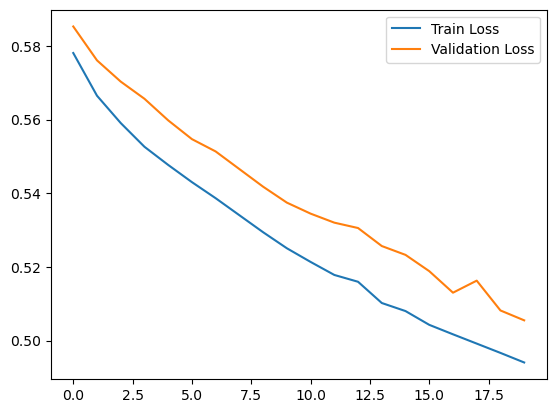

In [8]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


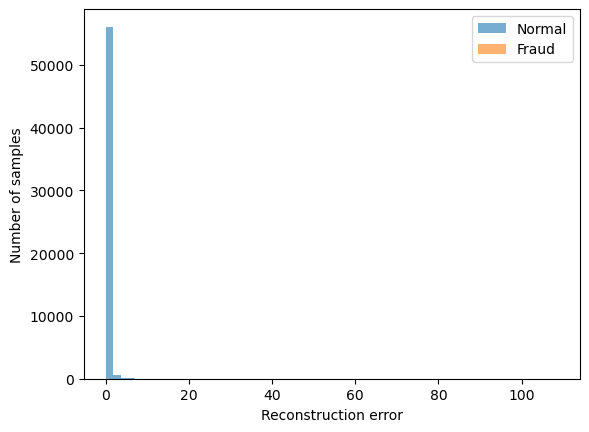

In [9]:
# Get reconstruction for test set
X_test_pred = autoencoder.predict(X_test)

# Calculate MSE per sample
mse = np.mean(np.power(X_test - X_test_pred, 2), axis=1)

# Plot reconstruction error for normal vs fraud
plt.hist(mse[y_test == 0], bins=50, alpha=0.6, label='Normal')
plt.hist(mse[y_test == 1], bins=50, alpha=0.6, label='Fraud')
plt.legend()
plt.xlabel('Reconstruction error')
plt.ylabel('Number of samples')
plt.show()


In [10]:
threshold = np.percentile(mse[y_test == 0], 95)  # 95th percentile of normal error

print(f"Reconstruction error threshold: {threshold}")

# Predict fraud if error > threshold
y_pred = (mse > threshold).astype(int)

# Evaluate results
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Reconstruction error threshold: 1.1242310428193423
[[54020  2844]
 [   16    82]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.84      0.05        98

    accuracy                           0.95     56962
   macro avg       0.51      0.89      0.51     56962
weighted avg       1.00      0.95      0.97     56962

